<a href="https://colab.research.google.com/github/Sachinthana-Pathiranage/Sri-Ayu-Ayurvedic-Care/blob/Pamoda/Notebooks/Pamoda_Notebooks/FESymptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
import json
from google.colab import drive

In [ ]:
#load the dataset
data = pd.read_csv('/content/Disease_Prediction_dataset.csv')

# Understanding the dataset

In [ ]:
data.head(10)

,shivers,acidity,tiredness,weight_loss,lethargy,cough,high_fever,digestive_issues,headache,stomach_ache,...,phlegm,sinus_pressure,chest_pain,dizziness,overweight,weak_muscles,irritability,frequent_urination,vision_changes,prognosis
0,1,0,0,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,Migraine
1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,Migraine
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Migraine
3,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,Migraine
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,Migraine
5,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,1,1,Migraine
6,1,0,0,1,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,1,Migraine
7,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,0,Migraine
8,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,Migraine
9,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,Migraine


In [ ]:
data.tail(10)

,shivers,acidity,tiredness,weight_loss,lethargy,cough,high_fever,digestive_issues,headache,stomach_ache,...,phlegm,sinus_pressure,chest_pain,dizziness,overweight,weak_muscles,irritability,frequent_urination,vision_changes,prognosis
710,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,diabetes
711,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,diabetes
712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,diabetes
713,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,diabetes
714,0,0,1,1,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,diabetes
715,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,diabetes
716,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,diabetes
717,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,diabetes
718,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,diabetes
719,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,diabetes


In [ ]:
data.columns

Index(['shivers', 'acidity', 'tiredness', 'weight_loss', 'lethargy', 'cough',
       'high_fever', 'digestive_issues', 'headache', 'stomach_ache',
       'vomiting', 'loss_of_appetite', 'gnawing', 'upper_stomach_pain',
       'burning_ache', 'swelled_lymph_nodes', 'blurry_eyesight', 'phlegm',
       'sinus_pressure', 'chest_pain', 'dizziness', 'overweight',
       'weak_muscles', 'irritability', 'frequent_urination', 'vision_changes',
       'prognosis'],
      dtype='object')

In [ ]:
data.shape

(720, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   shivers              720 non-null    int64 
 1   acidity              720 non-null    int64 
 2   tiredness            720 non-null    int64 
 3   weight_loss          720 non-null    int64 
 4   lethargy             720 non-null    int64 
 5   cough                720 non-null    int64 
 6   high_fever           720 non-null    int64 
 7   digestive_issues     720 non-null    int64 
 8   headache             720 non-null    int64 
 9   stomach_ache         720 non-null    int64 
 10  vomiting             720 non-null    int64 
 11  loss_of_appetite     720 non-null    int64 
 12  gnawing              720 non-null    int64 
 13  upper_stomach_pain   720 non-null    int64 
 14  burning_ache         720 non-null    int64 
 15  swelled_lymph_nodes  720 non-null    int64 
 16  blurry_e

In [ ]:
pd.isnull(obj=data).sum()

,0
shivers,0
acidity,0
tiredness,0
weight_loss,0
lethargy,0
cough,0
high_fever,0
digestive_issues,0
headache,0
stomach_ache,0


In [ ]:
data['prognosis'].unique()

array(['Migraine', 'Common_cold', 'gastritis', 'diabetes'], dtype=object)

In [ ]:
data['prognosis'].value_counts()

,count
prognosis,
Common_cold,200
Migraine,185
gastritis,179
diabetes,156


In [ ]:
data.describe()

,shivers,acidity,tiredness,weight_loss,lethargy,cough,high_fever,digestive_issues,headache,stomach_ache,...,blurry_eyesight,phlegm,sinus_pressure,chest_pain,dizziness,overweight,weak_muscles,irritability,frequent_urination,vision_changes
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.262500,0.341667,0.419444,0.119444,0.225000,0.222222,0.240278,0.272222,0.327778,0.193056,...,0.286111,0.226389,0.283333,0.319444,0.254167,0.205556,0.273611,0.125000,0.158333,0.247222
std,0.440299,0.474598,0.493811,0.324536,0.417873,0.416029,0.427549,0.445413,0.469730,0.394971,...,0.452256,0.418785,0.450930,0.466586,0.435694,0.404388,0.446122,0.330949,0.365307,0.431697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check for duplicate rows
duplicates = data.duplicated()

# Count duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates
data = data.drop_duplicates()
print('Duplicate rows removed')

Number of duplicate rows: 7
Duplicate rows removed


In [ ]:
data.shape

(713, 27)

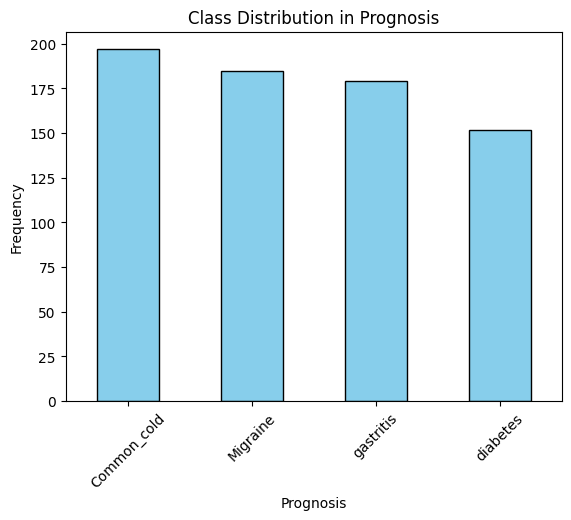

In [ ]:
# Bar chart for class distribution
class_counts = data['prognosis'].value_counts()
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution in Prognosis')
plt.xlabel('Prognosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

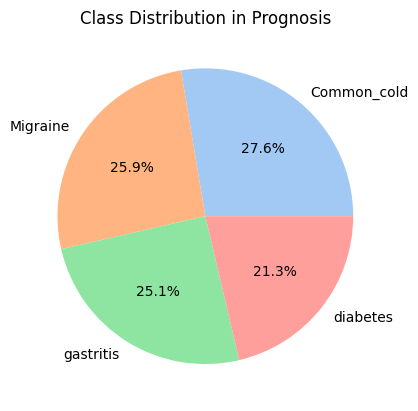

In [ ]:
# Pie chart for class distribution
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Class Distribution in Prognosis')
plt.ylabel('')
plt.show()

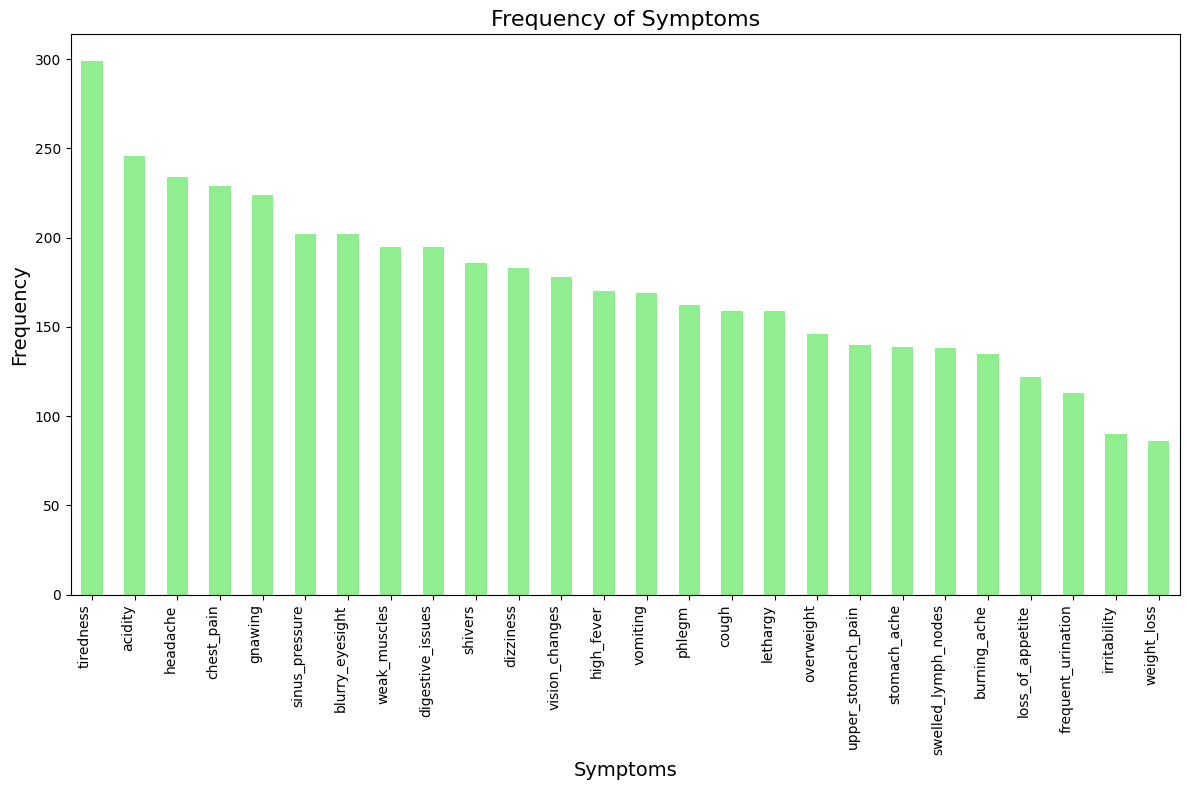

In [ ]:
# Frequency of Symptoms
symptom_columns = [col for col in data.columns if col != 'prognosis']
symptom_sums = data[symptom_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
symptom_sums.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Symptoms', fontsize=16)
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align text for better visibility
plt.tight_layout()  # Automatically adjust layout to prevent overlap
plt.show()

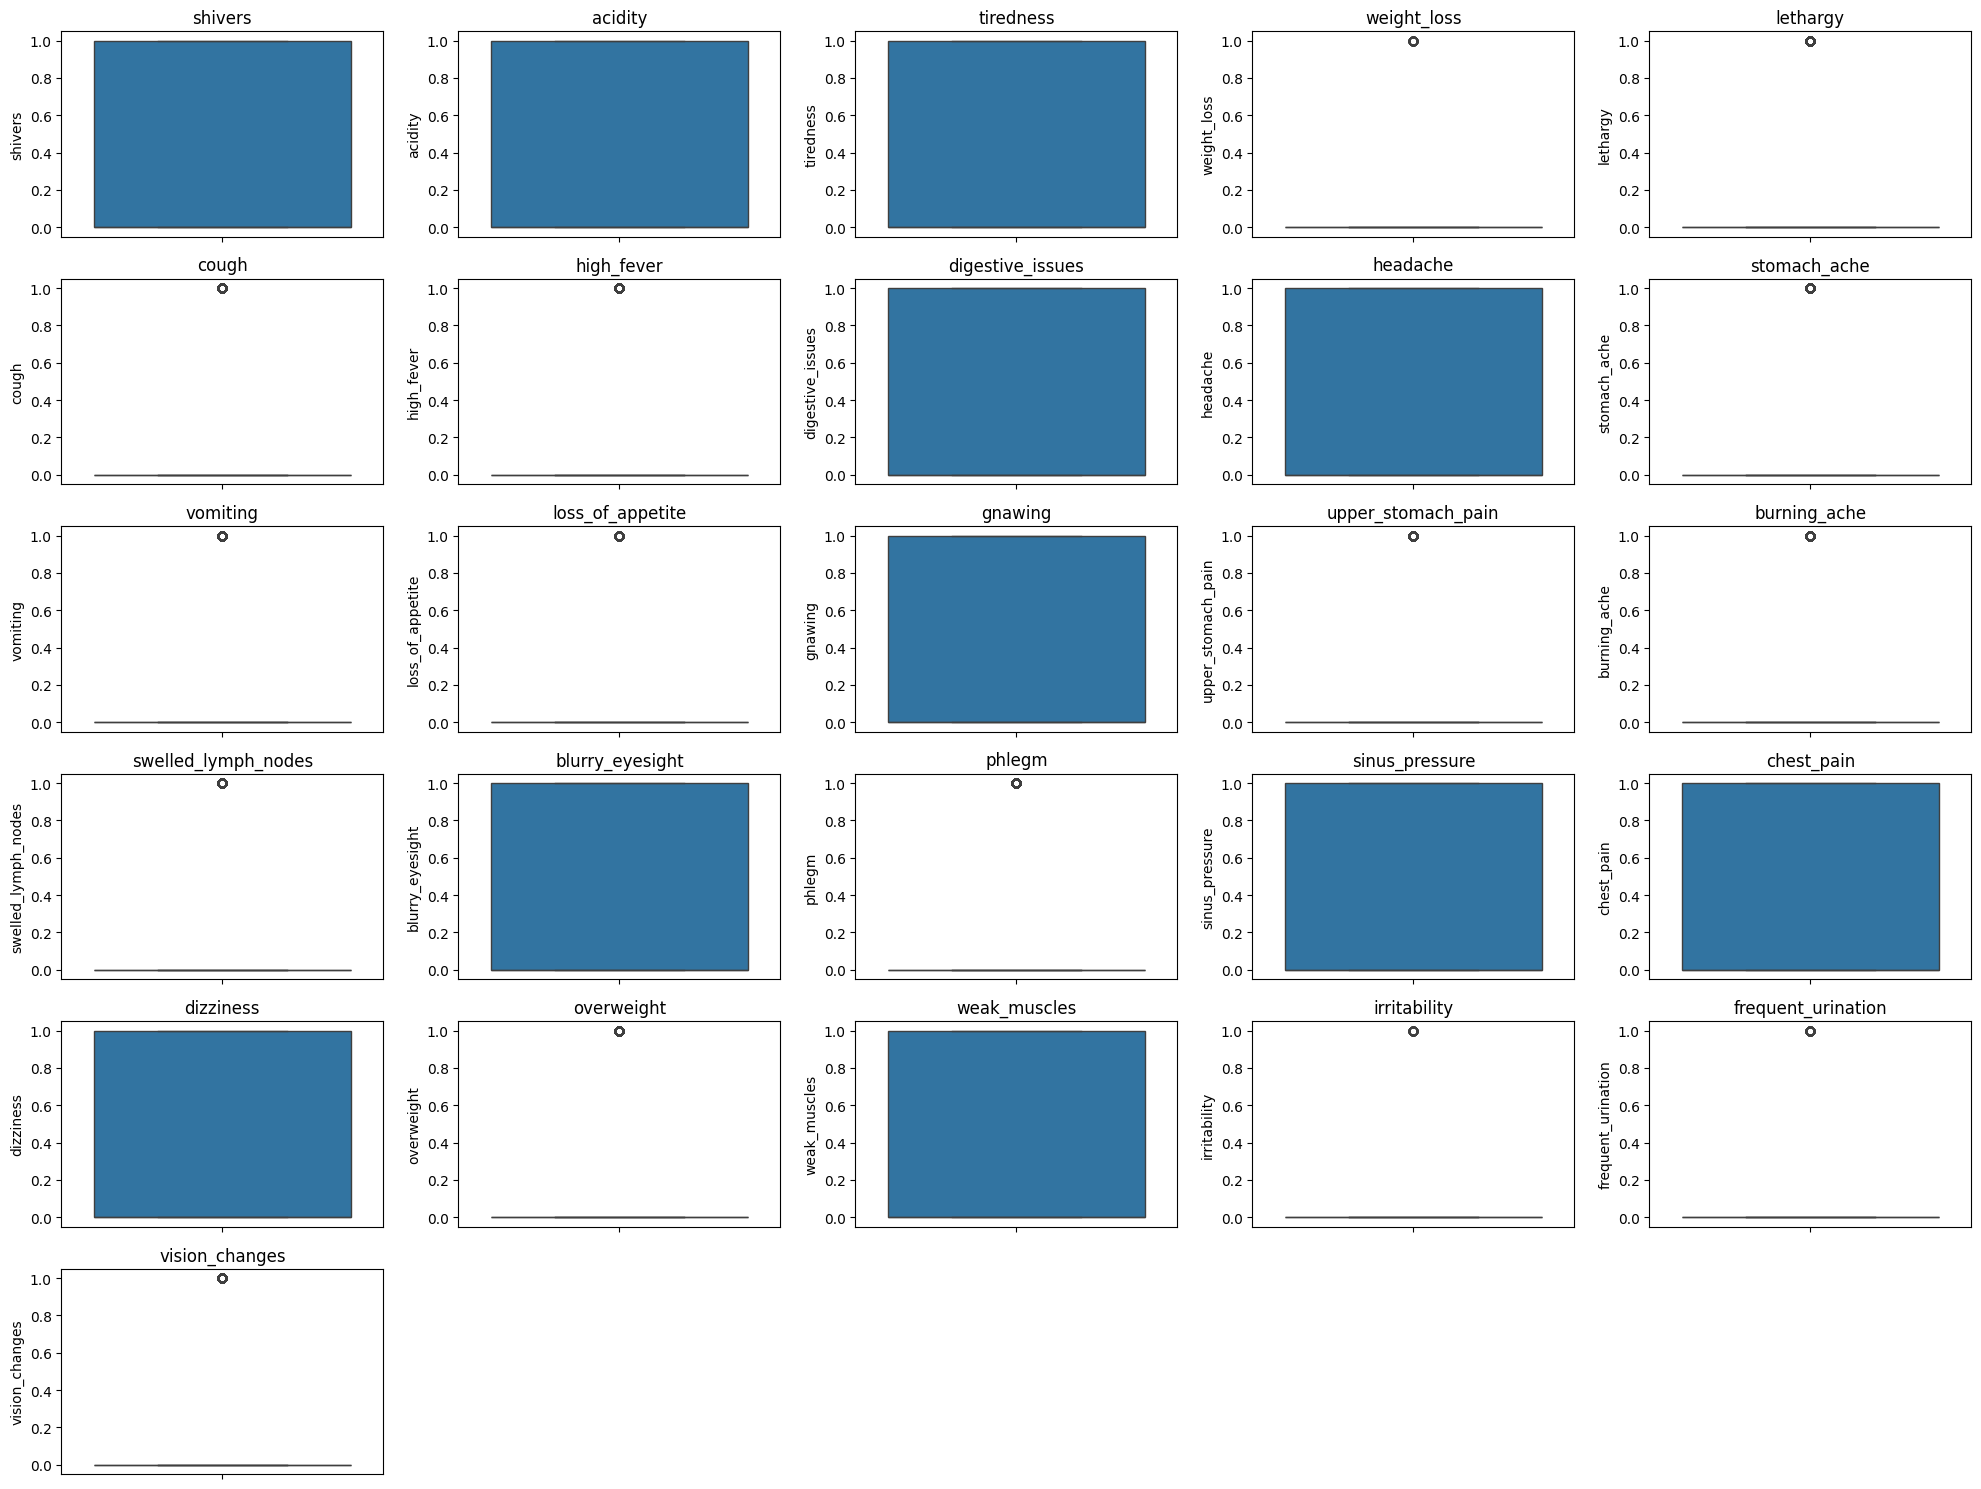

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize boxplots for all binary features
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[:-1]):  # Exclude the target variable
    plt.subplot(6, 5, i + 1)  # Adjust subplot grid based on the number of features
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Encoding the target separately
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis']              # Target

# Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
#print only the classes with their label
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Common_cold': 0, 'Migraine': 1, 'diabetes': 2, 'gastritis': 3}


In [ ]:
from sklearn.feature_selection import chi2

# Perform chi-square test
chi_scores, p_values = chi2(data.drop('prognosis', axis=1), data['prognosis'])

# Create a DataFrame for better readability
chi_results = pd.DataFrame({
    'Feature': data.drop('prognosis', axis=1).columns,
    'Chi-Square Score': chi_scores,
    'P-Value': p_values
}).sort_values(by='P-Value')

# Print results
print("Chi-Square Test Results:")
print(chi_results)

Chi-Square Test Results:
                Feature  Chi-Square Score       P-Value
23         irritability        256.864865  2.142776e-55
3           weight_loss        192.738445  1.563287e-41
9          stomach_ache        172.926501  2.970629e-37
15  swelled_lymph_nodes        171.057539  7.522385e-37
24   frequent_urination        168.461147  2.734464e-36
14         burning_ache        158.022434  4.896508e-34
16      blurry_eyesight        145.569572  2.379018e-31
17               phlegm        135.766949  3.090886e-29
5                 cough        125.838485  4.263615e-27
21           overweight        115.359096  7.705015e-25
7      digestive_issues        107.964288  3.008853e-23
13   upper_stomach_pain         96.505741  8.763819e-21
19           chest_pain         92.635878  5.947287e-20
6            high_fever         90.521940  1.692186e-19
18       sinus_pressure         84.360288  3.560121e-18
25       vision_changes         82.294828  9.879066e-18
10             vomiting

In [ ]:
#Dropping the original 'prognosis' column
data = data.drop('prognosis', axis=1)

In [ ]:
data.head()

,shivers,acidity,tiredness,weight_loss,lethargy,cough,high_fever,digestive_issues,headache,stomach_ache,...,blurry_eyesight,phlegm,sinus_pressure,chest_pain,dizziness,overweight,weak_muscles,irritability,frequent_urination,vision_changes
0,1,0,0,0,0,1,1,1,1,0,...,0,0,1,1,0,0,1,1,0,0
1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add the encoded target back to the dataset temporarily
data_with_target = data.copy()
data_with_target['prognosis_encoded'] = y_encoded

# Compute correlation matrix
correlation_matrix = data_with_target.corr()

# Extract correlations of features with the target variable, excluding the target itself
target_correlation = correlation_matrix['prognosis_encoded'].drop('prognosis_encoded').sort_values(ascending=False)

# Print the correlations
print("Correlation of features with the target variable (prognosis_encoded):")
print(target_correlation)

Correlation of features with the target variable (prognosis_encoded):
stomach_ache           0.446895
burning_ache           0.422882
upper_stomach_pain     0.292648
gnawing                0.245476
digestive_issues       0.241090
vomiting               0.239447
acidity                0.194021
weight_loss            0.121750
frequent_urination     0.105706
lethargy               0.089213
blurry_eyesight       -0.001845
tiredness             -0.005627
dizziness             -0.015019
chest_pain            -0.017193
loss_of_appetite      -0.031204
weak_muscles          -0.032008
overweight            -0.058178
vision_changes        -0.071425
irritability          -0.146284
shivers               -0.295857
headache              -0.313523
high_fever            -0.319233
sinus_pressure        -0.323849
cough                 -0.356843
phlegm                -0.440514
swelled_lymph_nodes   -0.506012
Name: prognosis_encoded, dtype: float64


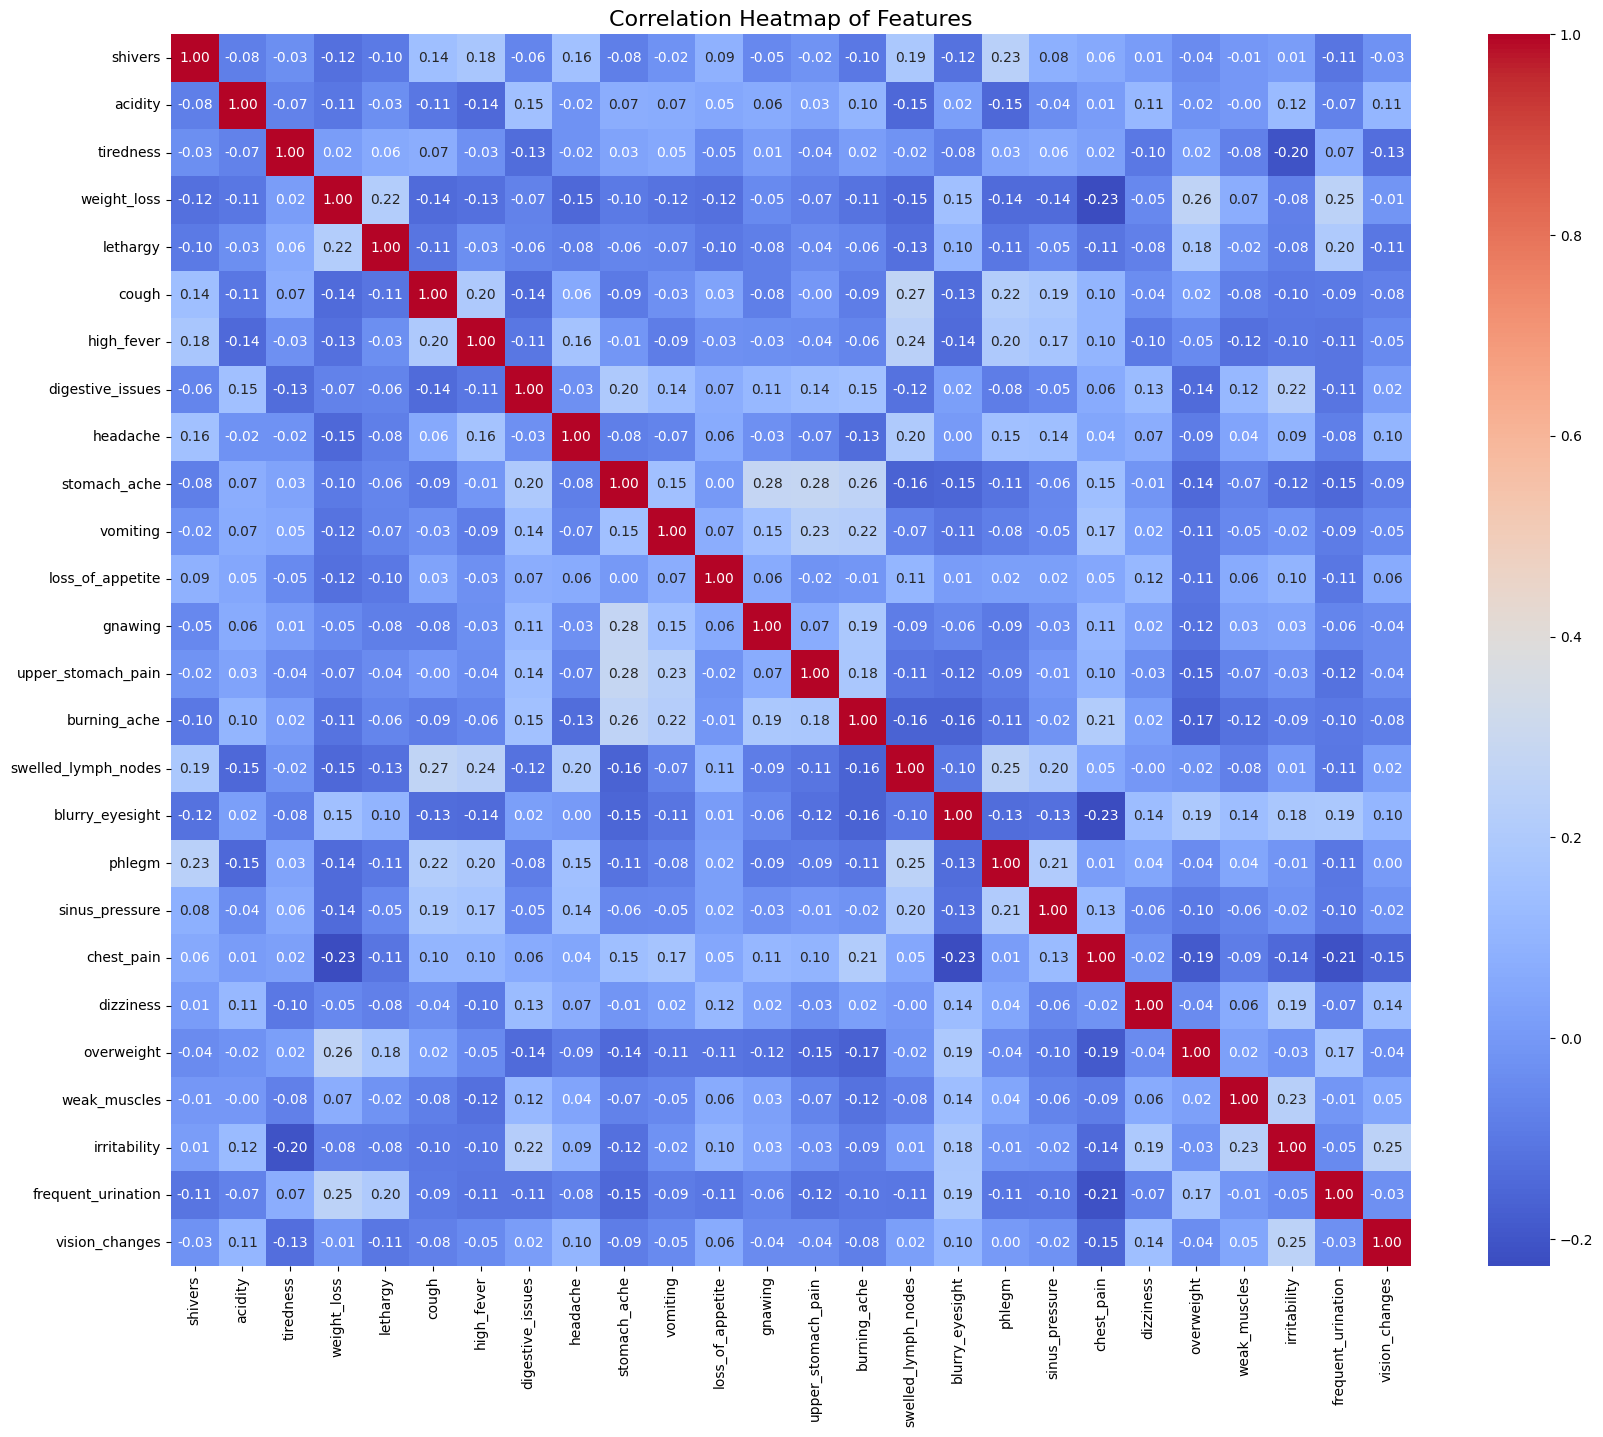

In [ ]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

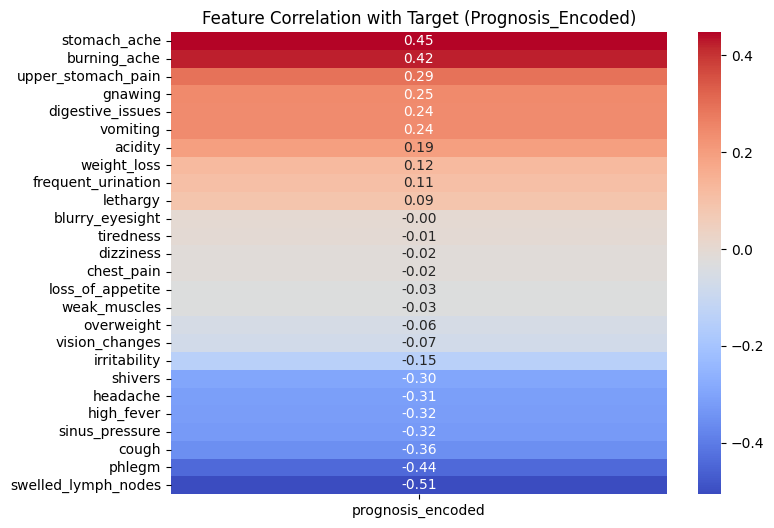

In [ ]:
#Plot a focused heatmap with correlations between features and the target variable only
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation with Target (Prognosis_Encoded)')
plt.show()

In [ ]:
# Check for non-binary values in binary columns
binary_columns = [col for col in data.columns if set(data[col].unique()).issubset({0, 1})]
for col in binary_columns:
    unique_values = data[col].unique()
    if not set(unique_values).issubset({0, 1}):
        print(f"Unexpected values in {col}: {unique_values}")

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)

    # Training set evaluation
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Validation set evaluation
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    return train_accuracy, val_accuracy

# Store results
results = {}

for name, model in models.items():
    print(f"Evaluating {name}...")
    train_acc, val_acc = evaluate_model(model, X_train_scaled, y_train, X_val_scaled, y_val)
    results[name] = {"Training Accuracy": train_acc, "Validation Accuracy": val_acc}
    print(f"{name} - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}\n")

Evaluating Logistic Regression...
Logistic Regression - Training Accuracy: 0.9439, Validation Accuracy: 0.9065

Evaluating SVM...
SVM - Training Accuracy: 0.9739, Validation Accuracy: 0.9159

Evaluating KNN...
KNN - Training Accuracy: 0.9038, Validation Accuracy: 0.8785

Evaluating Decision Tree...
Decision Tree - Training Accuracy: 1.0000, Validation Accuracy: 0.8411

Evaluating Random Forest...
Random Forest - Training Accuracy: 1.0000, Validation Accuracy: 0.8972



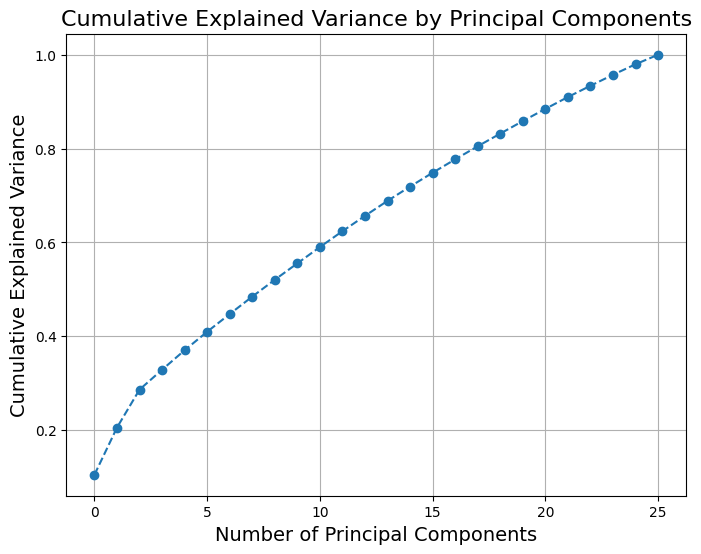

Number of components to retain 90% variance: 22
Shape of dataset after PCA: (713, 22)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target
X = data_with_target.drop('prognosis_encoded', axis=1)  # Features
y = data_with_target['prognosis_encoded']              # Target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance by Principal Components', fontsize=16)
plt.grid()
plt.show()

# Choose number of components to retain 90% variance
n_components = next(i for i, cum_var in enumerate(cumulative_variance_ratio) if cum_var >= 0.90) + 1
print(f'Number of components to retain 90% variance: {n_components}')

# Reapply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Output the shape of the transformed dataset
print(f'Shape of dataset after PCA: {X_pca_optimal.shape}')

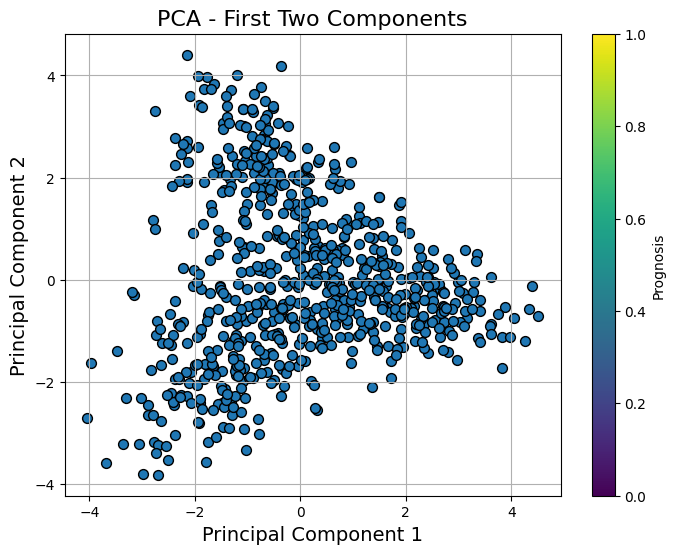

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA - First Two Components', fontsize=16)
plt.colorbar(label='Prognosis')
plt.grid()
plt.show()

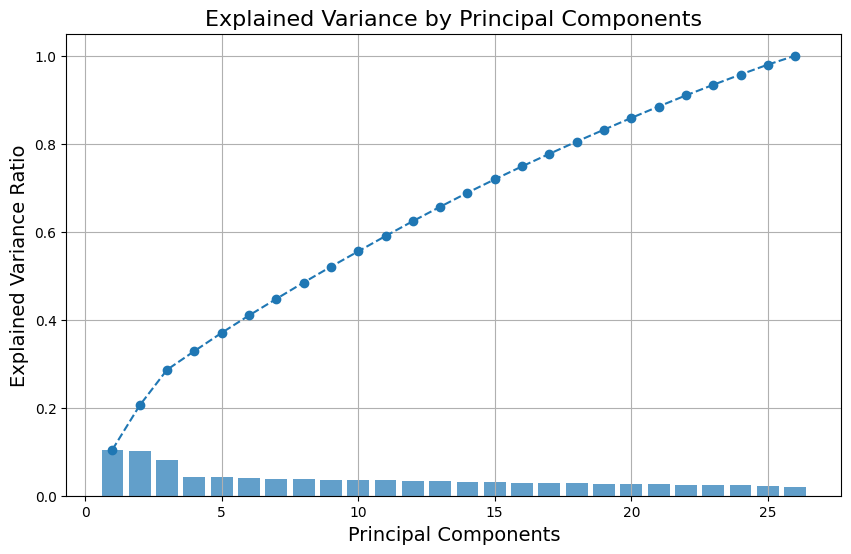

In [ ]:
# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.grid()
plt.show()

In [ ]:
# Get the PCA loading matrix
loading_matrix = pca_optimal.components_

import numpy as np

# Sum the absolute values of loadings for all retained components
feature_importance = np.sum(np.abs(loading_matrix), axis=0)

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#print all the features with their importance
print(feature_importance_df)

                Feature  Importance
0               shivers    3.944318
4              lethargy    3.931623
8              headache    3.857923
21           overweight    3.744779
24   frequent_urination    3.736484
12              gnawing    3.674570
6            high_fever    3.661382
5                 cough    3.645255
18       sinus_pressure    3.637638
1               acidity    3.619271
2             tiredness    3.591292
10             vomiting    3.555899
11     loss_of_appetite    3.521602
17               phlegm    3.467575
7      digestive_issues    3.450192
14         burning_ache    3.373681
20            dizziness    3.366640
19           chest_pain    3.361868
25       vision_changes    3.331566
16      blurry_eyesight    3.301538
3           weight_loss    3.279124
22         weak_muscles    3.271494
13   upper_stomach_pain    3.177884
9          stomach_ache    3.045376
15  swelled_lymph_nodes    2.858952
23         irritability    2.737328


In [ ]:
# Define a threshold
threshold = 3.0  # Adjust based on your dataset

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]
print(selected_features)

               Feature  Importance
0              shivers    3.944318
4             lethargy    3.931623
8             headache    3.857923
21          overweight    3.744779
24  frequent_urination    3.736484
12             gnawing    3.674570
6           high_fever    3.661382
5                cough    3.645255
18      sinus_pressure    3.637638
1              acidity    3.619271
2            tiredness    3.591292
10            vomiting    3.555899
11    loss_of_appetite    3.521602
17              phlegm    3.467575
7     digestive_issues    3.450192
14        burning_ache    3.373681
20           dizziness    3.366640
19          chest_pain    3.361868
25      vision_changes    3.331566
16     blurry_eyesight    3.301538
3          weight_loss    3.279124
22        weak_muscles    3.271494
13  upper_stomach_pain    3.177884
9         stomach_ache    3.045376


In [ ]:
# Fit PCA on training data
pca_optimal = PCA(n_components=22)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)

# Save the fitted PCA object
joblib.dump(pca_optimal, 'pca_model.pkl')

['pca_model.pkl']

In [ ]:
# Check class distribution
class_distribution = y.value_counts()

# Display class distribution
print(class_distribution)

prognosis_encoded
0    197
1    185
3    179
2    152
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the PCA-transformed dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca_optimal, y, test_size=0.3, random_state=42, stratify=y
)

# Further split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Verify the shapes of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (499, 22), (499,)
Validation set: (107, 22), (107,)
Testing set: (107, 22), (107,)


In [ ]:
# Check class distributions in splits
print("Training class distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation class distribution:")
print(y_val.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Training class distribution:
prognosis_encoded
0    0.276553
1    0.260521
3    0.250501
2    0.212425
Name: proportion, dtype: float64

Validation class distribution:
prognosis_encoded
0    0.271028
1    0.261682
3    0.252336
2    0.214953
Name: proportion, dtype: float64

Test class distribution:
prognosis_encoded
0    0.280374
1    0.252336
3    0.252336
2    0.214953
Name: proportion, dtype: float64



Evaluating Logistic Regression...

Training Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       138
           1       0.93      0.87      0.90       130
           2       0.92      0.94      0.93       106
           3       0.91      0.92      0.92       125

    accuracy                           0.93       499
   macro avg       0.93      0.93      0.93       499
weighted avg       0.93      0.93      0.93       499

Validation Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.96      0.86      0.91        28
           2       0.84      0.91      0.88        23
           3       0.87      0.96      0.91        27

    accuracy                           0.91       107
   macro avg       0.91      0.91      0.91       107
weighted avg       0.91      0.91      0.91       107

Test Repor

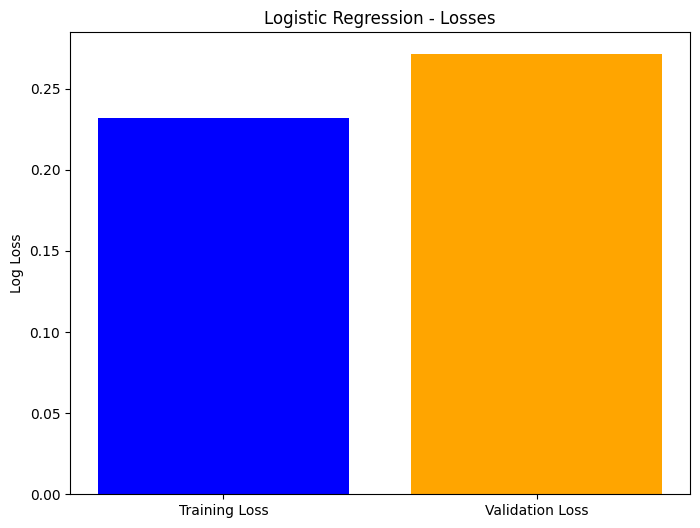


Evaluating SVM...

SVM - Training Loss: 0.1004, Validation Loss: 0.2310


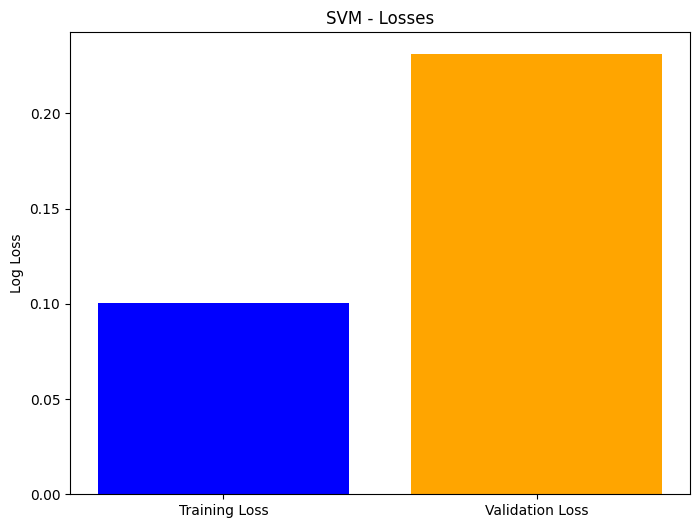


Evaluating KNN...

KNN - Training Loss: 0.2666, Validation Loss: 1.2887


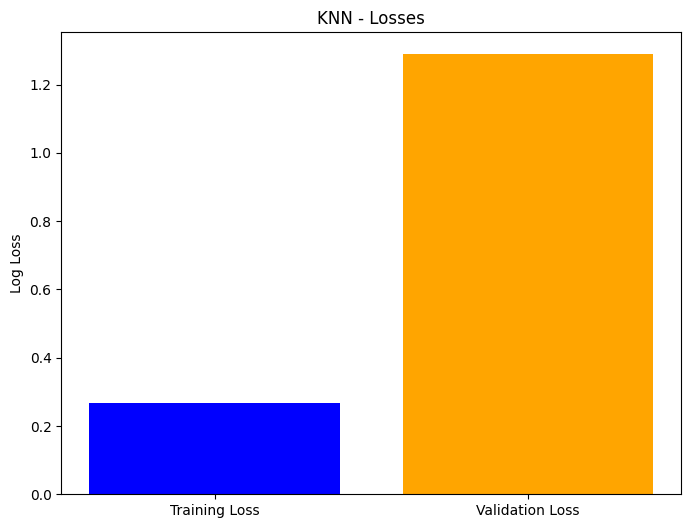


Evaluating Decision Tree...

Decision Tree - Training Loss: 0.1949, Validation Loss: 2.0901


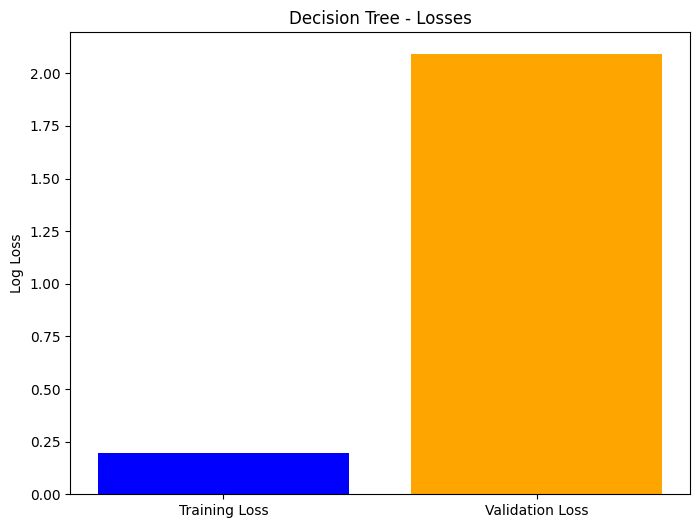


Evaluating Random Forest...

Random Forest - Training Loss: 0.1290, Validation Loss: 0.4451


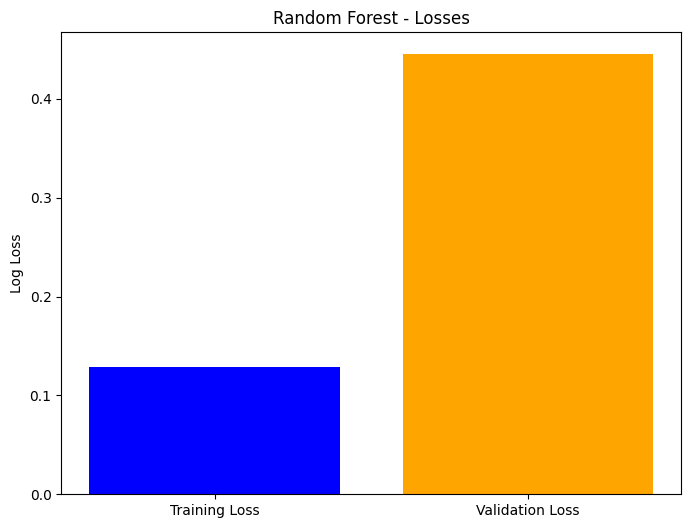


Evaluating XGBoost...

XGBoost - Training Loss: 0.0060, Validation Loss: 0.3745


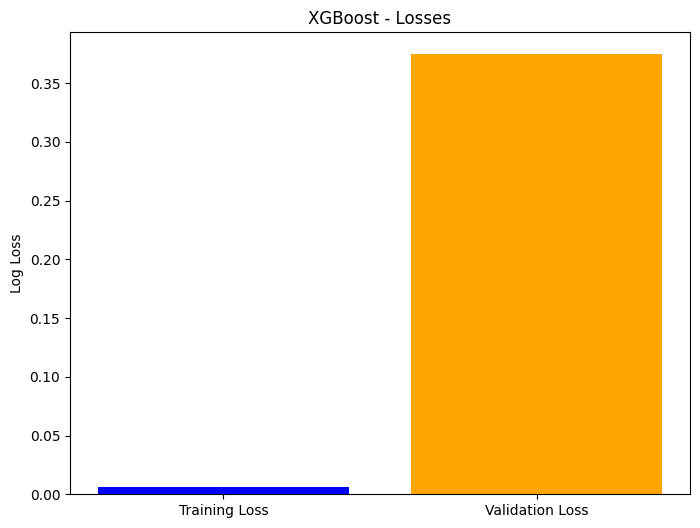


Evaluating MLP...

MLP - Training Loss: 0.0045, Validation Loss: 0.3473


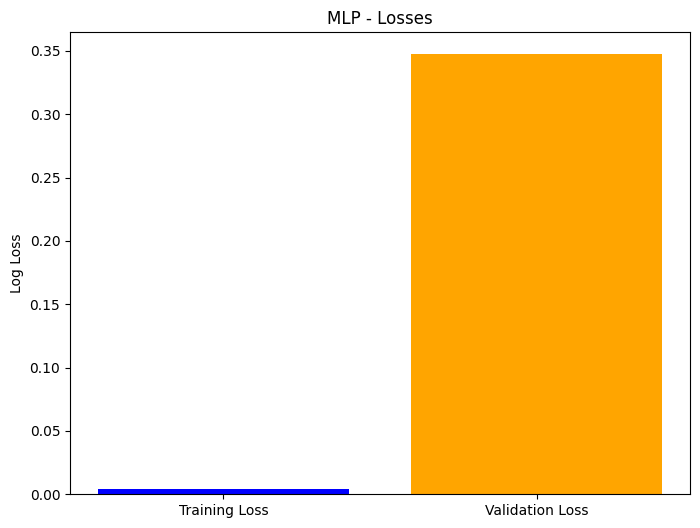

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Store models and their results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

results = {}

# Function to evaluate and plot
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)

    # Evaluate on training set
    y_train_pred = model.predict(X_train)
    train_report = classification_report(y_train, y_train_pred)

    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    val_report = classification_report(y_val, y_val_pred)

    # Evaluate on test set
    y_test_pred = model.predict(X_test)
    test_report = classification_report(y_test, y_test_pred)

    # Store results
    results[model.__class__.__name__] = {
        "Training Report": train_report,
        "Validation Report": val_report,
        "Test Report": test_report
    }

    print(f"\nTraining Report for {model.__class__.__name__}:\n", train_report)
    print(f"Validation Report for {model.__class__.__name__}:\n", val_report)
    print(f"Test Report for {model.__class__.__name__}:\n", test_report)


# Apply models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)

import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Function to calculate training and validation losses
def calculate_loss(model, X_train, y_train, X_val, y_val, model_name):
    # Predict probabilities if available, otherwise fallback to predictions
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)
        y_val_proba = model.predict_proba(X_val)
    elif hasattr(model, "decision_function"):
        y_train_proba = model.decision_function(X_train)
        y_val_proba = model.decision_function(X_val)
    else:
        y_train_proba = model.predict(X_train)
        y_val_proba = model.predict(X_val)

    # Compute losses
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)

    print(f"\n{model_name} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    return train_loss, val_loss

# Initialize losses for plotting
training_losses = {}
validation_losses = {}

# Function to evaluate and plot loss curves for each model
def evaluate_and_plot(model, X_train, y_train, X_val, y_val, model_name):
    model.fit(X_train, y_train)

    # Calculate training and validation losses
    train_loss, val_loss = calculate_loss(model, X_train, y_train, X_val, y_val, model_name)

    # Store losses
    training_losses[model_name] = train_loss
    validation_losses[model_name] = val_loss

    # Plot losses for each model
    plt.figure(figsize=(8, 6))
    plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'orange'])
    plt.title(f'{model_name} - Losses')
    plt.ylabel('Log Loss')
    plt.show()

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Loop through models
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_and_plot(model, X_train, y_train, X_val, y_val, name)


Evaluating Logistic Regression...

Training Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       138
           1       0.93      0.87      0.90       130
           2       0.92      0.94      0.93       106
           3       0.91      0.92      0.92       125

    accuracy                           0.93       499
   macro avg       0.93      0.93      0.93       499
weighted avg       0.93      0.93      0.93       499

Validation Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.96      0.86      0.91        28
           2       0.84      0.91      0.88        23
           3       0.87      0.96      0.91        27

    accuracy                           0.91       107
   macro avg       0.91      0.91      0.91       107
weighted avg       0.91      0.91  

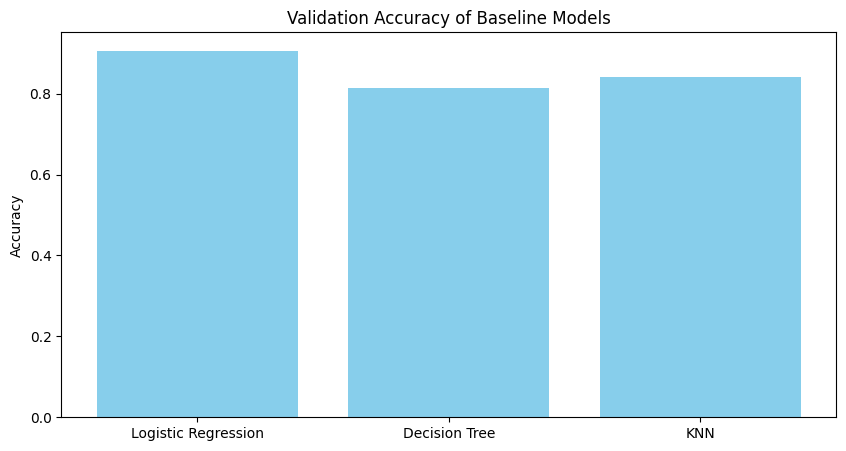

Validation Loss of Baseline Models:
Logistic Regression: 0.271175244971748
Decision Tree: 1.5276450479229227
KNN: 1.2887429351940474

Training Loss of Baseline Models:
Logistic Regression: 0.23190696398299063
Decision Tree: 0.4701319712846823
KNN: 0.2666226469551905


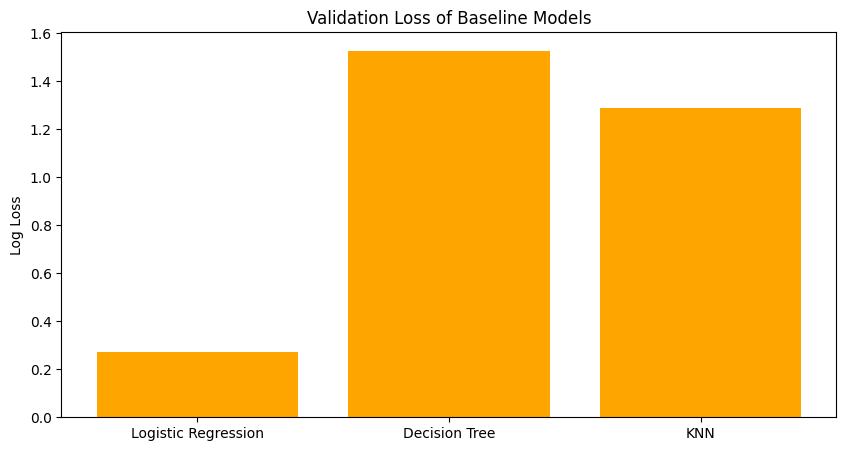

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score
import matplotlib.pyplot as plt
import json

# Define baseline models
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Function to evaluate baseline models
def evaluate_baseline(model, X_train, y_train, X_val, y_val, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Evaluate on training set
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train) if hasattr(model, "predict_proba") else None
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_loss = log_loss(y_train, y_train_proba) if y_train_proba is not None else None
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val) if hasattr(model, "predict_proba") else None
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_loss = log_loss(y_val, y_val_proba) if y_val_proba is not None else None
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Print reports
    print(f"\nTraining Classification Report for {model_name}:")
    print(classification_report(y_train, y_train_pred))
    print(f"Validation Classification Report for {model_name}:")
    print(classification_report(y_val, y_val_pred))

    return {
        "Training Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
        "Training Loss": train_loss,
        "Validation Loss": val_loss,
        "Training F1-Score": train_f1,
        "Validation F1-Score": val_f1,
        "Training Report": classification_report(y_train, y_train_pred, output_dict=True),
        "Validation Report": classification_report(y_val, y_val_pred, output_dict=True)
    }

# Store results
baseline_results = {}

# Train and evaluate baseline models
for name, model in baseline_models.items():
    print(f"\nEvaluating {name}...")
    baseline_results[name] = evaluate_baseline(model, X_train, y_train, X_val, y_val, name)

# Save results to a JSON file
with open("baseline_results.json", "w") as f:
    json.dump(baseline_results, f, indent=4)

print("Results saved to baseline_results.json")

# Visualize accuracies
accuracies = {name: result["Validation Accuracy"] for name, result in baseline_results.items()}
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Validation Accuracy of Baseline Models")
plt.ylabel("Accuracy")
plt.show()
#print validation loss and training loss for each model
print("Validation Loss of Baseline Models:")
for name, result in baseline_results.items():
    print(f"{name}: {result['Validation Loss']}")

print("\nTraining Loss of Baseline Models:")
for name, result in baseline_results.items():
    print(f"{name}: {result['Training Loss']}")

# Visualize losses
losses = {name: result["Validation Loss"] for name, result in baseline_results.items()}
plt.figure(figsize=(10, 5))
plt.bar(losses.keys(), losses.values(), color='orange')
plt.title("Validation Loss of Baseline Models")
plt.ylabel("Log Loss")
plt.show()




Evaluating Random Forest...
Random Forest - Training Accuracy: 0.9419, Validation Accuracy: 0.8785
Random Forest - Training Loss: 0.4500, Validation Loss: 0.5869

Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       138
           1       0.99      0.86      0.92       130
           2       0.96      0.95      0.96       106
           3       0.92      0.97      0.95       125

    accuracy                           0.94       499
   macro avg       0.95      0.94      0.94       499
weighted avg       0.94      0.94      0.94       499

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.95      0.71      0.82        28
           2       0.91      0.91      0.91        23
           3       0.81      0.93      0.86        27

    accuracy                           0.88       107
   macro 

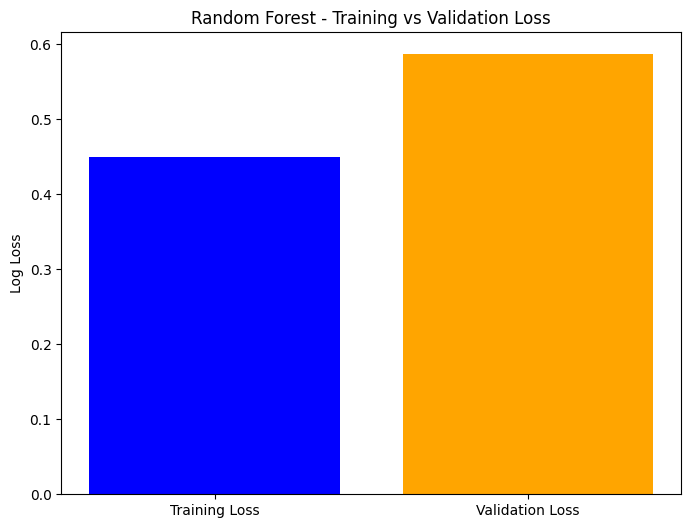

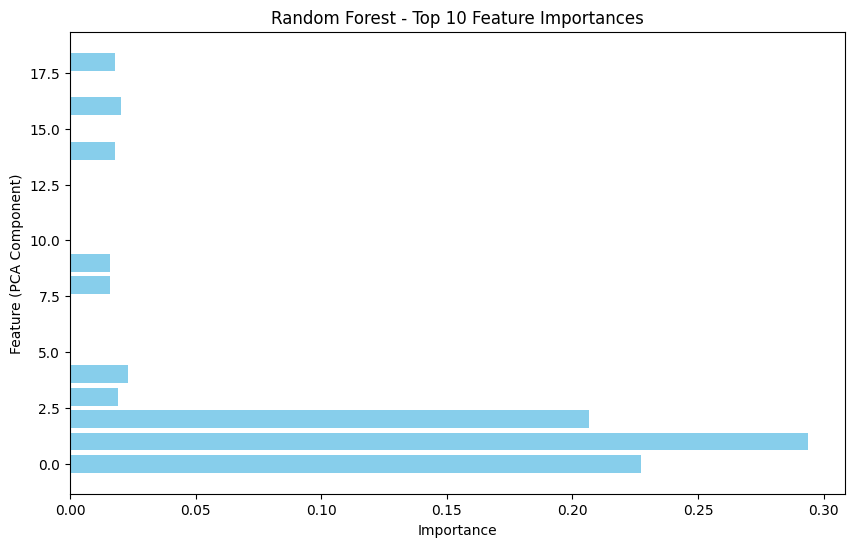

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Define complex models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)}
def evaluate_and_plot(model, X_train, y_train, X_val, y_val, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Probabilities for log loss
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)
        y_val_proba = model.predict_proba(X_val)
    elif hasattr(model, "decision_function"):
        y_train_proba = model.decision_function(X_train)
        y_val_proba = model.decision_function(X_val)
    else:
        y_train_proba = y_train_pred
        y_val_proba = y_val_pred

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Calculate losses
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)

    # Print results
    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    print(f"{model_name} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Classification Report
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))

    print("Testing Classification Report:")
    y_test_pred = model.predict(X_test)
    print(classification_report(y_test, y_test_pred))


    # Plot training vs validation loss
    plt.figure(figsize=(8, 6))
    plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'orange'])
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.ylabel('Log Loss')
    plt.show()

    # Feature importance for tree-based models
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        features = range(X_train.shape[1])  # Use PCA components

        # Create a DataFrame for better readability
        feature_importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1], color='skyblue')
        plt.title(f'{model_name} - Top 10 Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature (PCA Component)')
        plt.show()
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_and_plot(model, X_train, y_train, X_val, y_val, name)


Evaluating Random Forest...
Random Forest - Training Accuracy: 0.9118, Validation Accuracy: 0.8598
Random Forest - Training Loss: 0.7020, Validation Loss: 0.7769

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       138
           1       0.98      0.77      0.86       130
           2       0.94      0.95      0.94       106
           3       0.87      0.97      0.92       125

    accuracy                           0.91       499
   macro avg       0.92      0.91      0.91       499
weighted avg       0.92      0.91      0.91       499

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.95      0.68      0.79        28
           2       0.80      0.87      0.83        23
           3       0.83      0.93      0.88        27

    accuracy                           0.86       107
   macro 

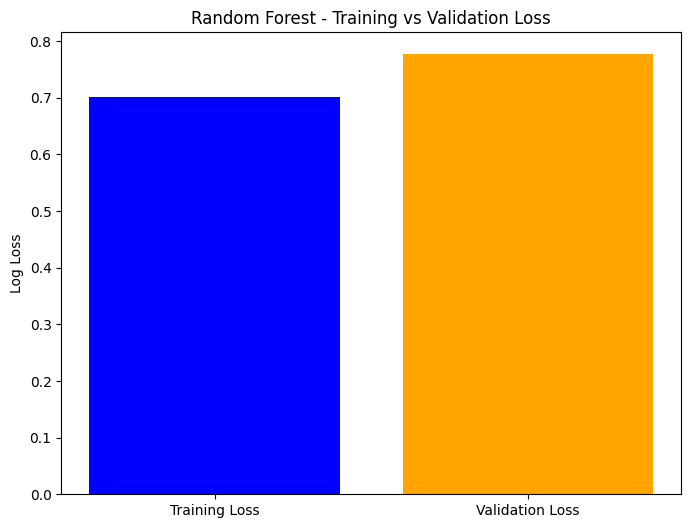

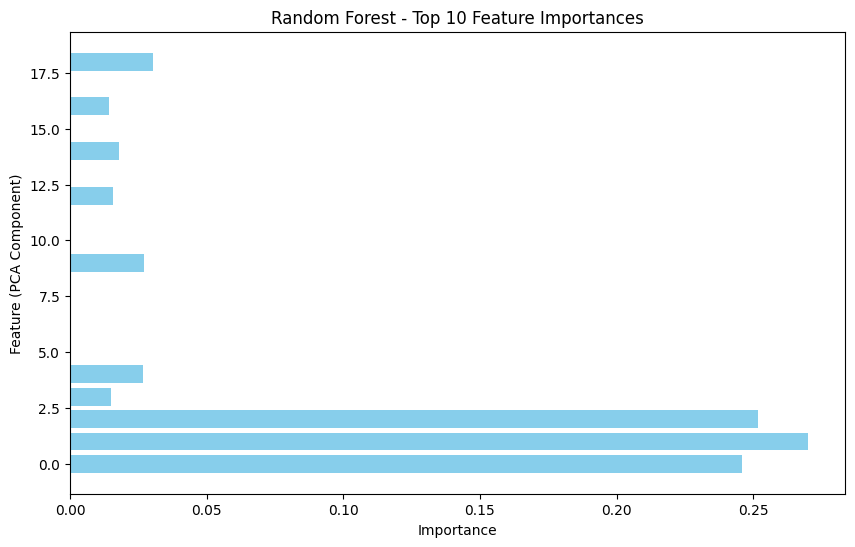

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Define complex models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_split=10, random_state=42)}
def evaluate_and_plot(model, X_train, y_train, X_val, y_val, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Probabilities for log loss
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)
        y_val_proba = model.predict_proba(X_val)
    elif hasattr(model, "decision_function"):
        y_train_proba = model.decision_function(X_train)
        y_val_proba = model.decision_function(X_val)
    else:
        y_train_proba = y_train_pred
        y_val_proba = y_val_pred

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Calculate losses
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)

    # Print results
    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    print(f"{model_name} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Classification Report
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))

    print("Testing Classification Report:")
    y_test_pred = model.predict(X_test)
    print(classification_report(y_test, y_test_pred))


    # Plot training vs validation loss
    plt.figure(figsize=(8, 6))
    plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'orange'])
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.ylabel('Log Loss')
    plt.show()

    # Feature importance for tree-based models
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        features = range(X_train.shape[1])  # Use PCA components

        # Create a DataFrame for better readability
        feature_importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1], color='skyblue')
        plt.title(f'{model_name} - Top 10 Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature (PCA Component)')
        plt.show()
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_and_plot(model, X_train, y_train, X_val, y_val, name)


Evaluating Random Forest...
Random Forest - Training Accuracy: 0.9098, Validation Accuracy: 0.8692
Random Forest - Training Loss: 0.6951, Validation Loss: 0.7676

Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       138
           1       0.97      0.77      0.86       130
           2       0.89      0.95      0.92       106
           3       0.89      0.97      0.93       125

    accuracy                           0.91       499
   macro avg       0.91      0.91      0.91       499
weighted avg       0.91      0.91      0.91       499

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.68      0.79        28
           2       0.78      0.91      0.84        23
           3       0.86      0.93      0.89        27

    accuracy                           0.87       107
   macro 

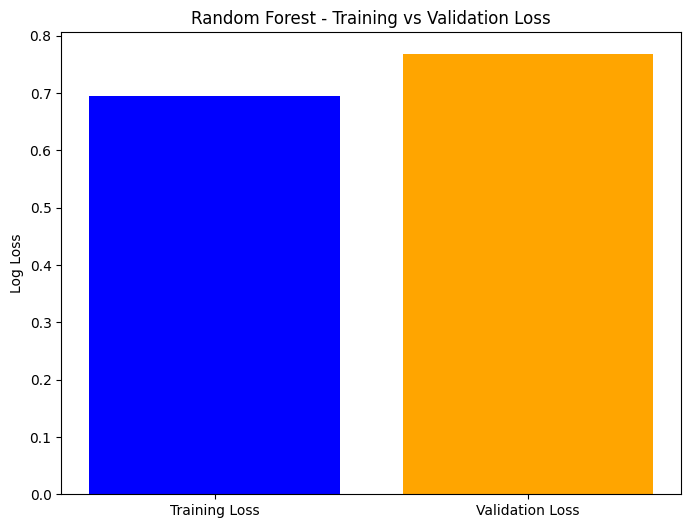

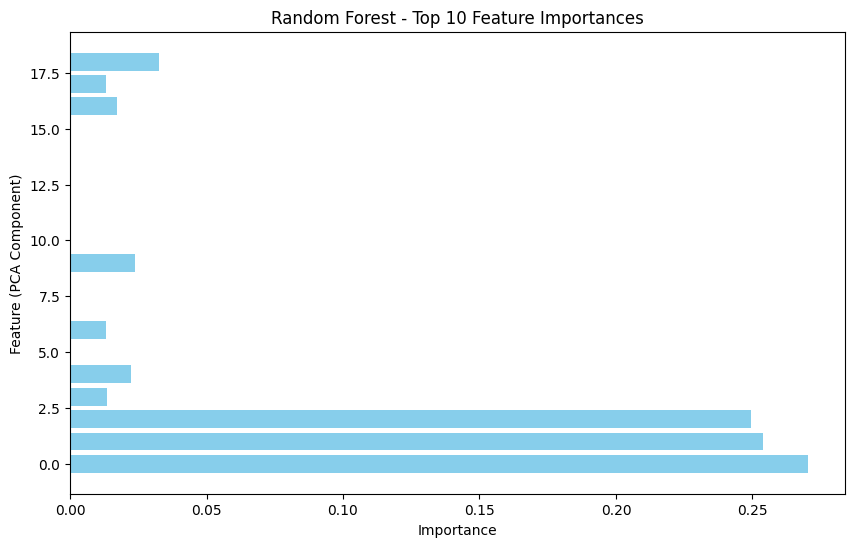

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Define complex models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_split=10, random_state=42, class_weight='balanced')}
def evaluate_and_plot(model, X_train, y_train, X_val, y_val, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Probabilities for log loss
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)
        y_val_proba = model.predict_proba(X_val)
    elif hasattr(model, "decision_function"):
        y_train_proba = model.decision_function(X_train)
        y_val_proba = model.decision_function(X_val)
    else:
        y_train_proba = y_train_pred
        y_val_proba = y_val_pred

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Calculate losses
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)

    # Print results
    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    print(f"{model_name} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Classification Report
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))

    print("Testing Classification Report:")
    y_test_pred = model.predict(X_test)
    print(classification_report(y_test, y_test_pred))

    # Plot training vs validation loss
    plt.figure(figsize=(8, 6))
    plt.bar(['Training Loss', 'Validation Loss'], [train_loss, val_loss], color=['blue', 'orange'])
    plt.title(f'{model_name} - Training vs Validation Loss')
    plt.ylabel('Log Loss')
    plt.show()

    # Feature importance for tree-based models
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        features = range(X_train.shape[1])  # Use PCA components

        # Create a DataFrame for better readability
        feature_importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1], color='skyblue')
        plt.title(f'{model_name} - Top 10 Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature (PCA Component)')
        plt.show()
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_and_plot(model, X_train, y_train, X_val, y_val, name)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'class_weight': 'balanced', 'bootstrap': True}
Best Cross-Validation Accuracy: 0.8657504268571291
Tuned Random Forest - Training Accuracy: 0.9339, Validation Accuracy: 0.8879
Tuned Random Forest - Training Loss: 0.4887, Validation Loss: 0.6061

Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       138
           1       0.98      0.85      0.91       130
           2       0.94      0.95      0.95       106
           3       0.92      0.96      0.94       125

    accuracy                           0.93       499
   macro avg       0.94      0.93      0.93       499
weighted avg       0.94      0.93      0.93       499

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97  

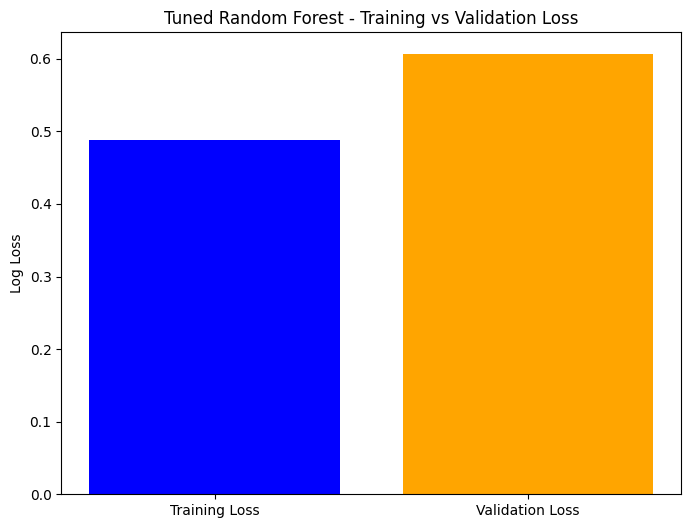

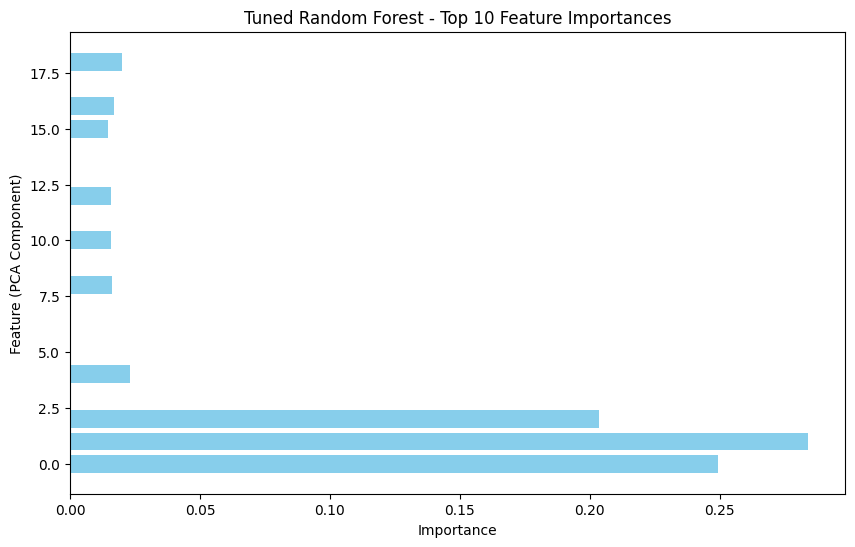

Test Accuracy: 0.9065


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
# Update the parameter grid to focus on simpler trees
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True],
    'class_weight': ['balanced']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=3,  # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the best model on validation and test sets
best_rf = random_search.best_estimator_
evaluate_and_plot(best_rf, X_train, y_train, X_val, y_val, "Tuned Random Forest")

# Feature importance after tuning
if hasattr(best_rf, "feature_importances_"):
    feature_importances = best_rf.feature_importances_
    features = range(X_train.shape[1])  # Use PCA components

    # Create a DataFrame for better readability
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)


    # Evaluate the best model on the test set
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


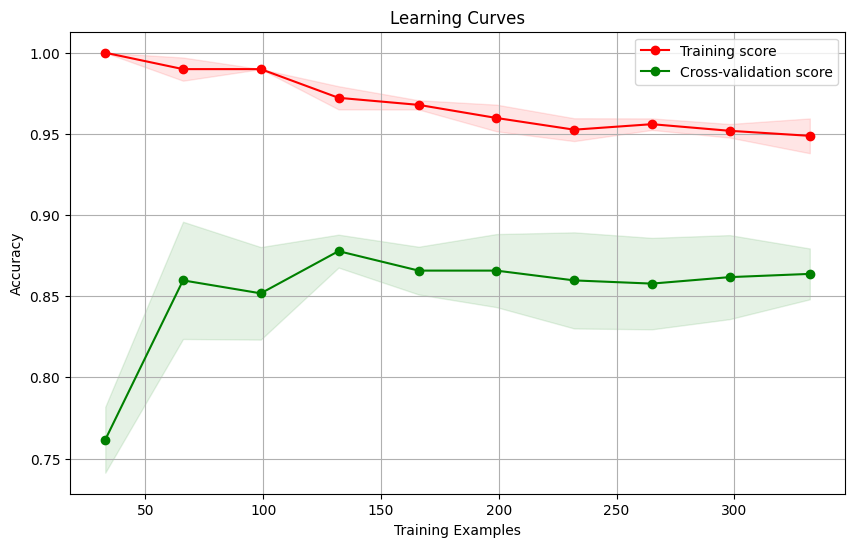

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=3, scoring='accuracy'):
    """
    Plots learning curves for a given model.

    Parameters:
    - model: The trained model to evaluate.
    - X: Feature matrix (training data).
    - y: Target vector (labels).
    - train_sizes: Array of proportions of the training set to use for learning curves.
    - cv: Number of cross-validation folds.
    - scoring: Scoring metric (e.g., 'accuracy', 'f1').
    """
    # Generate learning curve data
    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )

    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot the learning curves
    plt.figure(figsize=(10, 6))
    plt.fill_between(
        train_sizes_abs, train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes_abs, val_scores_mean - val_scores_std,
        val_scores_mean + val_scores_std, alpha=0.1, color="g"
    )
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes_abs, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Add labels and title
    plt.xlabel("Training Examples")
    plt.ylabel(scoring.capitalize())
    plt.title("Learning Curves")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves for the best Random Forest model
plot_learning_curves(best_rf, X_train, y_train, cv=3, scoring='accuracy')


In [ ]:
import joblib

# Save the best model
joblib.dump(best_rf, 'tuned_random_forest_model.pkl')

# Optionally, save the scaler if used
joblib.dump(scaler, 'scaler.pkl')

# Optionally, save the label encoder if used
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']